## 1.5 Text Mining

In [2]:
# Import Libraries 
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ariel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ariel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ariel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ariel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Tokenization with words from 20th_century text file

In [22]:
# Loading scraped 20th century data
myfile = open('20th_century_article.txt', encoding='utf-8') 

In [23]:
# Import txt file

with open('20th_century_article.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [3]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhideTop1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1World at the beginning of the century1.1.1"The war to end all wars" World War I 191419181.1.2Russian Revolution and communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war World War II 193919451.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.11The Holocaust1.3.12The Nucl

In [4]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhideTop1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1World', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", 'World', 'War', 'I', '191419181.1.2Russian', 'Revolution', 'and', 'communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 'dictatorship1.3Global', 'war', 'World', 'War', 'II', '193919451.3

In [5]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4771 samples and 19247 outcomes>


In [6]:
dist_words.most_common(10)

[('.', 1376),
 ('the', 1105),
 (',', 947),
 ('of', 615),
 ('and', 401),
 ('to', 326),
 ('in', 295),
 ("''", 272),
 ('``', 268),
 ('The', 267)]

In [7]:
# Creating a bar chart to show the 10 most common words in the text

# Separate words and frequencies
words, frequencies = zip(*dist_words.most_common(10))

Text(0.5, 1.0, 'Top 10 Most Common Words')

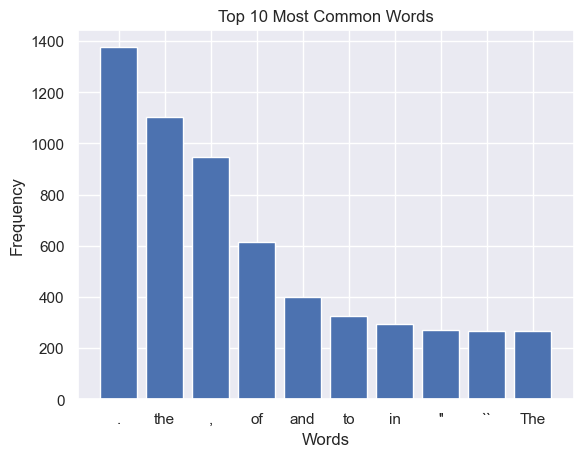

In [11]:
# Create the bar chart
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')

In [13]:
# Defining stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{"it's", 'too', 'on', 'nor', 'so', 'couldn', 'does', 'did', 'doing', 'have', "you're", 'their', 'who', 'isn', "haven't", 'needn', 'below', 'hers', 'can', 'before', 'after', 'wasn', 'd', 'but', 'ourselves', 'again', 'why', 'not', 're', 'themselves', 'those', 'some', 'she', 'into', 'off', 'mightn', 'wouldn', 'further', "shan't", 'being', 'yourself', 'now', 'between', 'having', 'itself', 'ours', 'very', 'o', 'theirs', 'these', 'at', 'such', 'll', 'of', "you've", 'my', 'few', 'didn', 'how', 'from', 'there', "wouldn't", 'that', 'your', "don't", "wasn't", 'yours', 'me', 'weren', 'an', 'myself', 'do', "mightn't", 'whom', 'hasn', "weren't", 'don', 'it', 'under', 'any', "needn't", 'only', 'more', 'ain', 'here', "won't", 'were', 'when', 'as', 'just', 'should', 'been', "aren't", 'all', 'about', 'both', 'while', 'over', 'y', 'most', "isn't", 'during', 'then', 'and', "couldn't", 'mustn', 'in', 'aren', 'has', "should've", 'same', 'him', 'out', 'yourselves', 'until', 'no', 'm', 've', 'be', 'ma', 'abo

In [14]:
# Removing stop words
filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [15]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchAppearanceDonateCreate',
 'accountLog',
 'inPersonal',
 'toolsDonate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhideTop1Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection1.1World',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 'World',
 'War',
 'I',
 '191419181.1.2Russian',
 'Revolution',
 'communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 'World',
 'War',
 'II',
 '193919451.3.1The',
 'war',
 'Europe1.3.2Blitzkrieg1.3.3Operation',
 'Barbarossa1.3.4Turni

In [16]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4668 samples and 14565 outcomes>


In [17]:
# Creating a bar chart to show the 10 most common words in the text after removing stop words

# Separate words and frequencies
words, frequencies = zip(*dist_words_filter.most_common(10))

Text(0.5, 1.0, 'Top 10 Most Common Words')

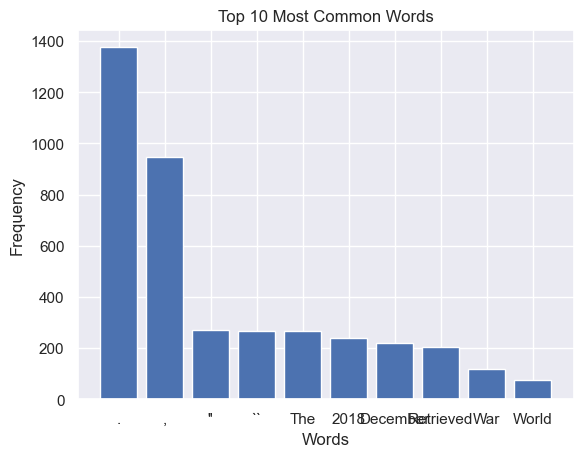

In [18]:
# Create the bar chart
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')

In [19]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [20]:
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchAppearanceDonateCreate    accountLog    inPersonal    toolsDonate    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhideTop Historic    events      th    centuryToggle    Historic    events      th    century    subsection   World    beginning    century               The    war    end    wars          World    War    I                 Russian    Revolution    communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war    World    War    II                 The    war    Europe     Blitzkrieg     Operation    Barbarossa     Turning    tides     Operation    Overlord     Final    days     The   

In [21]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhideTop', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 

In [22]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

In [23]:
# Creating a bar chart to show the 10 most common words in the text after removing stop words and punctuations

# Separate words and frequencies
words, frequencies = zip(*dist_words_filter_2.most_common(10))

Text(0.5, 1.0, 'Top 10 Most Common Words')

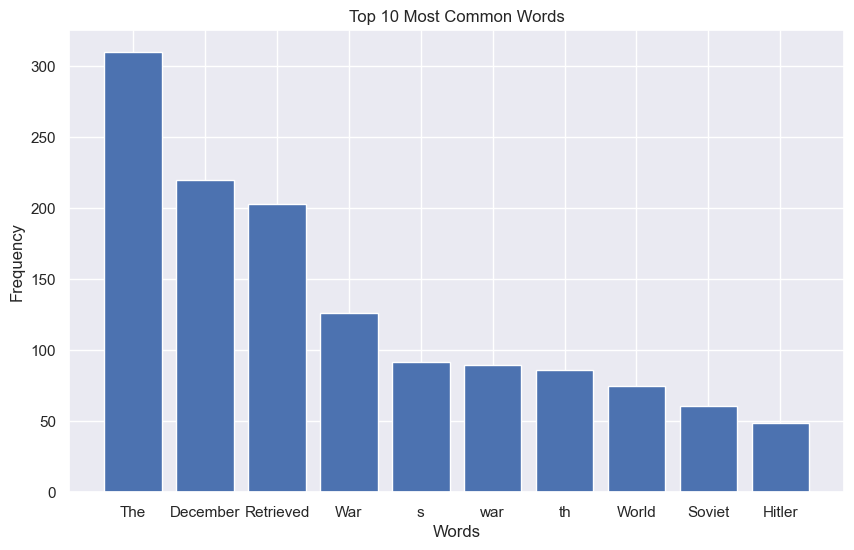

In [25]:
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')

This bar graph looks much better after removing stop words and punctuations. It definitely displays some significant words and names to draw insight from such as "Hitler", "Soviet", "war", and "December". 

### POS Tags with TextBlob

In [26]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The', 'th']

In [27]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [29]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 15.6 ms
Wall time: 6.4 ms


In [30]:
text

TextBlob("['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhideTop', 'Historic', 'events', 'centuryToggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'Allied', 'offensive', 'Final', 'day

In [33]:
tags_list = text.tags

In [34]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSearchAppearanceDonateCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'toolsDonate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'POS'),
 ("'learn", 'NNP'),
 ("'", 'POS')

In [35]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [36]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [37]:
# Using groupby function to plot different comparisons within the text
df_t = df_text.groupby('Word type').count().reset_index()

In [38]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,12
3,EX,12
4,FW,42


In [41]:
# Narrowing the group down to display the 20 largest groups on the list
top10 = df_t.nlargest(10, 'Words')

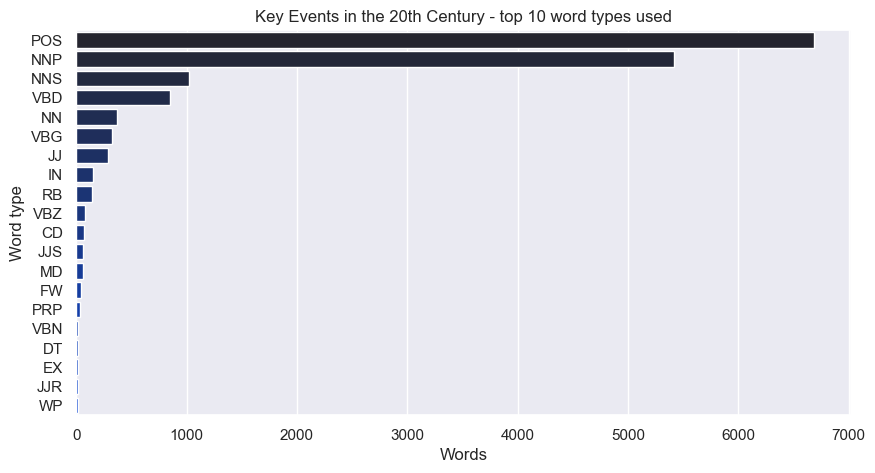

In [42]:
# Create bar chart
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("Key Events in the 20th Century - top 10 word types used")

Possessive endings and proper nouns are the most common word types used in the text. Plural nouns and past tense verbs are the next set of most used words.

### Creating 3 bar plots to display top Nouns, Verbs, and Adjectives

#### Top 15 Nouns

In [43]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [44]:
top15

,Word,Occurences
289,'December,220
1259,'War,126
2595,'war,90
1310,'World,75
1111,'Soviet,61
538,'Hitler,49
537,'History,40
1787,'first,39
561,'ISBN,39
2623,'world,36


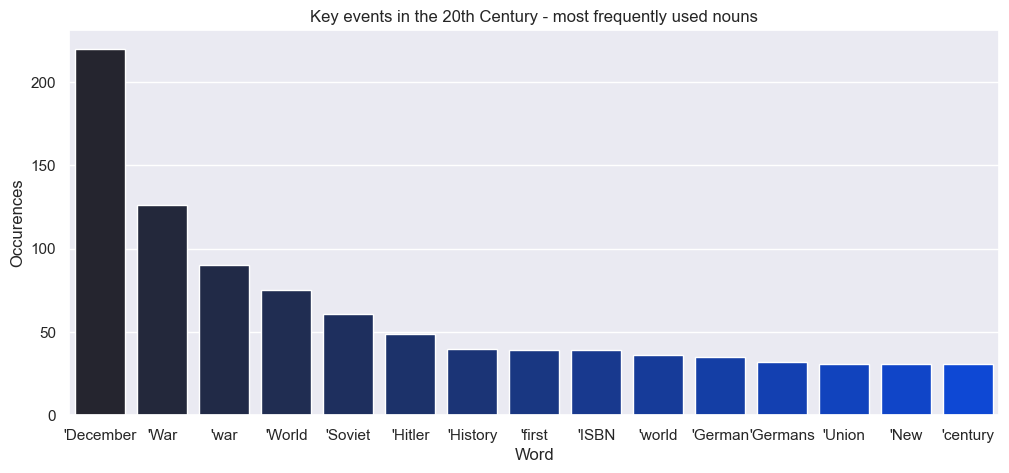

In [46]:
# Plotting the top 15 most used nouns
plt.figure(figsize=(12, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("Key events in the 20th Century - most frequently used nouns")

The nouns seem to frequently present the events of WW2, using key nouns such as "Hitler", "Germans", "Soviet", and "War", which is no surprise!

#### Verbs

In [55]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [56]:
top15

,Word,Occurences
27,'Retrieved,203
36,'United,31
0,'Allied,19
194,'led,15
318,'used,13
192,'launched,12
1,'Archived,10
92,'controlled,9
159,'forced,8
301,'surrendered,7


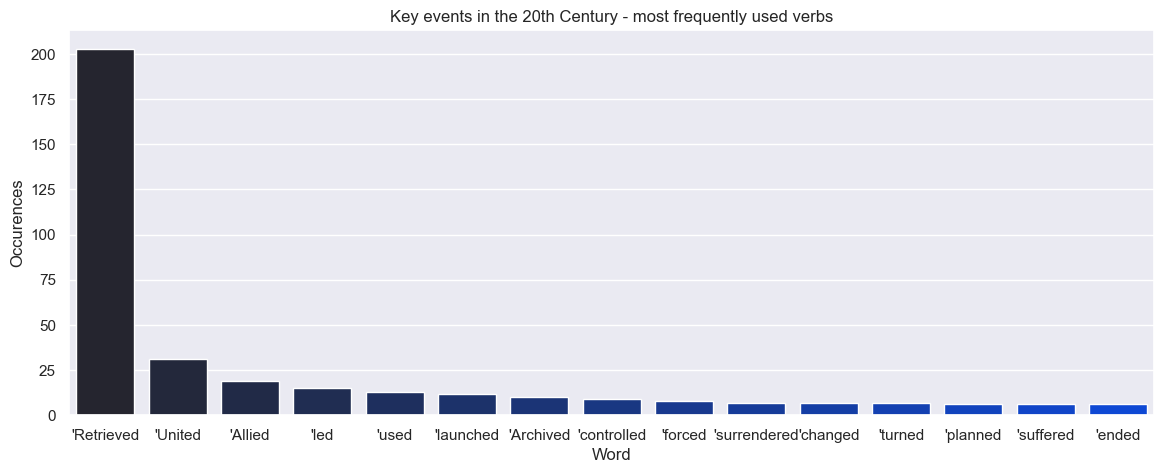

In [57]:
# Plotting the top 15 most used verbs
plt.figure(figsize = (14, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("Key events in the 20th Century - most frequently used verbs")

"Retrieved" is the most frequently used verb. This is interesting especially compared to how much more frequent it is used compared to the other verbs. This will be something to explore further, I believe.

#### Adjectives

In [50]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [51]:
top15

,Word,Occurences
26,'Japanese,36
2,'American,24
5,'Atlantic,13
19,'Guardian,10
13,'Chinese,7
41,'Russian,7
1,'African,6
102,'political,6
103,'possible,5
7,'Baltic,5


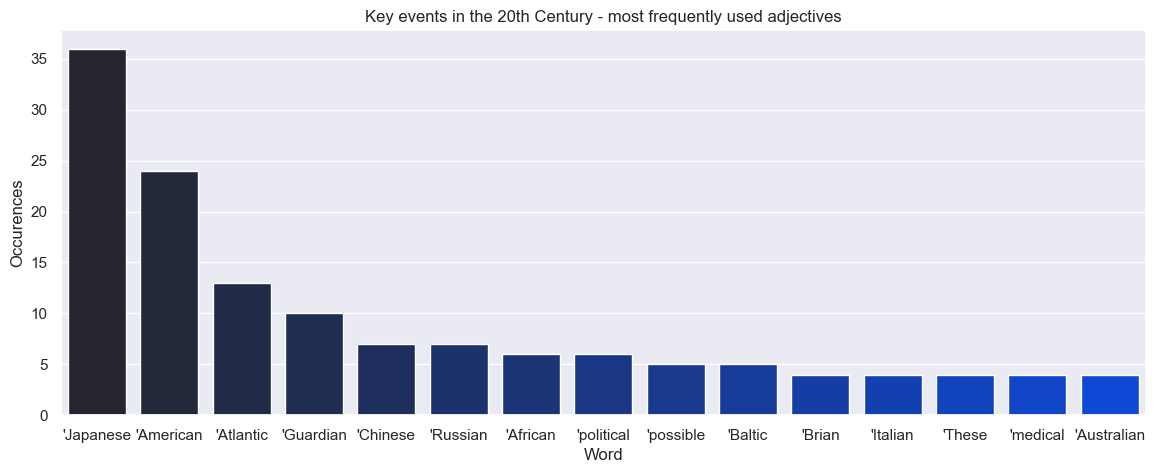

In [53]:
# Plotting the top 15 most used adjectives
plt.figure(figsize=(14, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("Key events in the 20th Century - most frequently used adjectives")

"Japanese", "American", and "Atlantic" are the most frequently used adjectives, which leads me to believe they may be frequently used for describing the events that took place at Pearl Harbor.

### Web Scraping Countries URL

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [93]:
# Set up Selenium WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [94]:
# Open the List of Countries URL
url = 'https://simple.m.wikipedia.org/wiki/List_of_countries'
driver.get(url)

In [101]:
# Find the div containing the list of countries
scraped_data = driver.find_elements(by = By.CLASS_NAME, value = 'content')

In [96]:
country_elems[0].text

'This is a list of sovereign states. Disputed countries are listed at the bottom.\nContents\nA\nchange\n Afghanistan –  Albania –  Algeria –  Andorra –  Angola –  Antigua and Barbuda –  Argentina –  Armenia –  Australia –  Austria –  Azerbaijan\nB\nchange\n Bahamas –  Bahrain –  Bangladesh –  Barbados –  Belarus –  Belgium –  Belize –  Benin –  Bhutan –  Bolivia –  Bosnia and Herzegovina –  Botswana –  Brazil –  Brunei –  Bulgaria –  Burkina Faso –  Burundi\nC\nchange\n Cabo Verde –  Cambodia –  Cameroon –  Canada –  Central African Republic –  Chad –  Chile –  China –  Colombia –  Comoros –  Congo, Democratic Republic of the –  Congo, Republic of the –  Costa Rica –  Croatia –  Cuba –  Cyprus –  Czech Republic\nD\nchange\n Denmark –  Djibouti –  Dominica –  Dominican Republic\nE\nchange\n East Timor –  Ecuador –  Egypt –  El Salvador –  Equatorial Guinea –  Eritrea –  Estonia –  Eswatini –  Ethiopia\nF\nchange\n Fiji –  Finland –  France\nG\nchange\n Gabon –  Gambia –  Georgia –  Germ

In [97]:
list_countries = country_elems[0].text.split("\n")

In [98]:
list_countries

['This is a list of sovereign states. Disputed countries are listed at the bottom.',
 'Contents',
 'A',
 'change',
 ' Afghanistan –  Albania –  Algeria –  Andorra –  Angola –  Antigua and Barbuda –  Argentina –  Armenia –  Australia –  Austria –  Azerbaijan',
 'B',
 'change',
 ' Bahamas –  Bahrain –  Bangladesh –  Barbados –  Belarus –  Belgium –  Belize –  Benin –  Bhutan –  Bolivia –  Bosnia and Herzegovina –  Botswana –  Brazil –  Brunei –  Bulgaria –  Burkina Faso –  Burundi',
 'C',
 'change',
 ' Cabo Verde –  Cambodia –  Cameroon –  Canada –  Central African Republic –  Chad –  Chile –  China –  Colombia –  Comoros –  Congo, Democratic Republic of the –  Congo, Republic of the –  Costa Rica –  Croatia –  Cuba –  Cyprus –  Czech Republic',
 'D',
 'change',
 ' Denmark –  Djibouti –  Dominica –  Dominican Republic',
 'E',
 'change',
 ' East Timor –  Ecuador –  Egypt –  El Salvador –  Equatorial Guinea –  Eritrea –  Estonia –  Eswatini –  Ethiopia',
 'F',
 'change',
 ' Fiji –  Finland

In [99]:
# Put the characters into a dataframe

df_countries = pd.DataFrame(list_countries, columns = ["Country"]) 

In [110]:
# Close the driver
driver.quit()

### Cleaning scraped countries dataframe

In [104]:
# If scraped_data is a list, join it into one string
if isinstance(scraped_data, list):
    scraped_data = " ".join([elem.text for elem in scraped_data])

In [105]:
print(type(scraped_data))

<class 'str'>


In [106]:
# Using regex to extract country names
country_pattern = r'\b[A-Za-z\s,\'-]+\b' 
countries = re.findall(country_pattern, scraped_data)

In [107]:
# Clean up the list to remove non-country names
exclude_keywords = ["change", "Contents", "Disputed", "Other entities", "See also", "Places"]
countries_cleaned = [country.strip() for country in countries if country.strip() not in exclude_keywords]

In [108]:
# Ensure countries are unique and sorted
countries_cleaned = sorted(set(countries_cleaned))

In [109]:
print(countries_cleaned[:20])

['', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azad Kashmir - Gilgit-Baltistan', 'Azerbaijan\nB\nchange\n Bahamas', 'Azores', 'Bahrain', 'Bailiwick of Guernsey', 'Bangladesh', 'Barbados']


### Counting occurences of each country in the 20th century text file

In [111]:
# Count occurrences of each country in the text using regex
country_counts = {}
for country in countries_cleaned:
    pattern = r'\b' + re.escape(country) + r'\b'  
    count = len(re.findall(pattern, data, flags=re.IGNORECASE)) 
    country_counts[country] = count

In [114]:
# Remove "and" and blank entries from the country counts
country_counts = {k: v for k, v in country_counts.items() if k.strip().lower() != "and" and k.strip() != ""}

In [115]:
# Create a DataFrame to store the results
df_country_mentions = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Frequency'])

In [121]:
# Show the top 10 countries with the highest frequency
df_country_mentions.sort_values(by='Frequency', ascending=False).head(10)

,Country,Frequency
88,Germany,42
115,Japan,33
242,United States,23
113,Italy,14
183,Poland,13
47,China,10
105,India,9
187,Russia,9
110,Islands,8
11,Austria,5


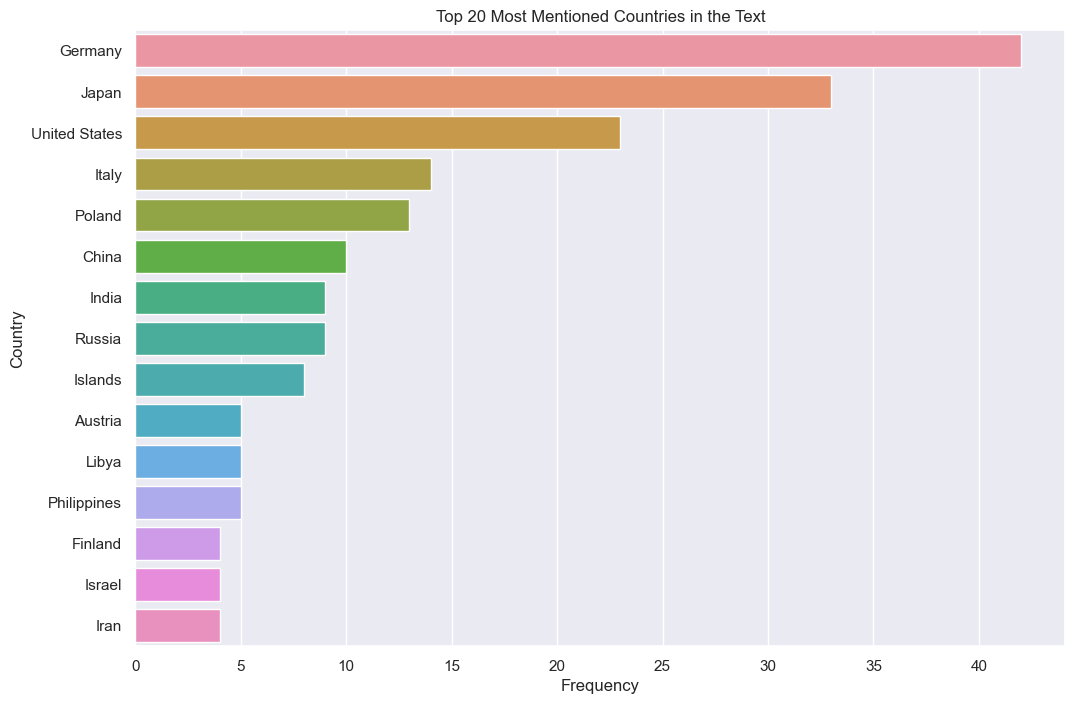

In [122]:
# Plot the frequency of country mentions
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Country', data=df_country_mentions.sort_values(by='Frequency', ascending=False).head(15))
plt.title("Top 20 Most Mentioned Countries in the Text")
plt.xlabel("Frequency")
plt.ylabel("Country")
plt.show()

It is no surprise to me that the top 5 countries are mentioned as many times as they are, but I am excited to learn more about their mentions, and I am excited to learn about why each of the other countries are mentioned.

### Exporting countries dataframe as csv

In [134]:
import os

In [136]:
output_directory = r'C:\Users\ariel\OneDrive\Desktop\School work\Data Visualizations with Python'

In [137]:
output_filename = 'countries.csv'

In [138]:
output_file_path = os.path.join(output_directory, output_filename)

In [139]:
# Export the DataFrame to the CSV file
df_country_mentions.to_csv(output_file_path, index=False)